In [385]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
pd.set_option('display.max_columns', 500)

In [386]:
cleaned_data = pd.read_csv('data/cleaned_price_data.csv')
cleaned_data.drop('Unnamed: 0', axis=1, inplace=True)

In [387]:
cleaned_data['Log_SalePrice'] = np.log(cleaned_data.SalePrice)

In [388]:
def one_hot_encode(df, column):
    """ One Hot Encode the column and place it back in the DataFrame

    Keyword arguments:
    df -- a dataframe with the column
    column -- a string of the name of the column

    Returns:
    df -- a dataframe with the encoded columns and the original column dropped
    """
    enc = OneHotEncoder(sparse=False)

    values = enc.fit_transform(pd.DataFrame(data=df[column], columns=[column]))
    feature_names = np.char.replace(enc.get_feature_names().astype(str), old='x0', new=column)

    encoded_df = pd.DataFrame(data=values, columns=feature_names, index=df.index)

    df = df.join(encoded_df, how='inner').drop(column, axis =1, inplace=False)

    return df


## MSSUBCLASS

In [389]:
cleaned_data = one_hot_encode(cleaned_data, 'MSSubClass')

## MSZoning

No relationship between log price and zoning

In [390]:
cleaned_data['MSZoning'] = cleaned_data['MSZoning'].map(lambda x: x.rstrip(' (all)'))

In [391]:
cleaned_data = one_hot_encode(cleaned_data, 'MSZoning')

## Street

In [392]:
enc = LabelBinarizer()
cleaned_data.Street = enc.fit_transform(cleaned_data.Street)


## Alley

In [393]:
cleaned_data.Alley = cleaned_data.Alley.replace({'DNE':0, 'Grvl':1, 'Pave':2})

## LotShape

In [394]:
cleaned_data = one_hot_encode(cleaned_data, 'LotShape')

## LandContour

In [395]:
cleaned_data = one_hot_encode(cleaned_data, 'LandContour')

## Utilities

In [396]:
cleaned_data.Utilities = cleaned_data.Utilities.replace({'ELO': 1, 'NoSeWa': 2, 'NoSewr':3, 'AllPub':4})

## LotConfig

In [397]:
cleaned_data = one_hot_encode(cleaned_data, 'LotConfig')

## LandSlope

In [398]:
cleaned_data = one_hot_encode(cleaned_data, 'LandSlope')

## Neighborhood

In [399]:
cleaned_data = one_hot_encode(cleaned_data, 'Neighborhood')

In [400]:
cleaned_data[['Condition1', 'Log_SalePrice']].groupby('Condition1').agg('median').sort_values(by='Log_SalePrice', ascending=True)

,Log_SalePrice
Condition1,
Artery,11.695247
Feedr,11.838626
RRAe,11.851104
RRNe,11.941451
Norm,11.998433
RRAn,12.030720
RRNn,12.109220
PosA,12.165251
PosN,12.240474


In [401]:
cleaned_data.Condition1 = cleaned_data.Condition1.replace({'Artery': 1, 'Feedr':2, 'RRAe':3, 'RRNe':4, 'Norm': 5, 'RRAn':6, 'RRNn':7, 'PosA': 8, 'PosN':9})

## Condition2

In [402]:
cleaned_data.Condition2 = cleaned_data.Condition2.replace({'Artery': 1, 'Feedr':2, 'RRAe':3, 'RRNe':4, 'Norm': 5, 'RRAn':6, 'RRNn':7, 'PosA': 8, 'PosN':9})

## BldgType

<AxesSubplot:xlabel='BldgType', ylabel='Log_SalePrice'>

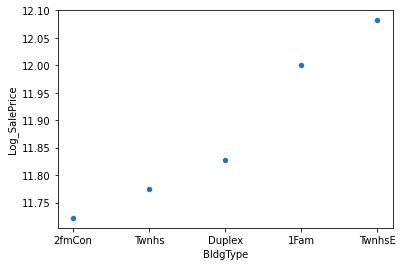

In [403]:
cleaned_data[['BldgType', 'Log_SalePrice']].groupby('BldgType').agg('median').sort_values(by='Log_SalePrice', ascending=True).reset_index(inplace=False).plot(kind= 'scatter', x='BldgType', y='Log_SalePrice')

In [404]:
cleaned_data.BldgType = cleaned_data.BldgType.replace({'2fmCon': 1, 'Twnhs':2, 'Duplex':3, '1Fam':4, 'TwnhsE': 5})

## HouseStyle

<AxesSubplot:xlabel='HouseStyle', ylabel='Log_SalePrice'>

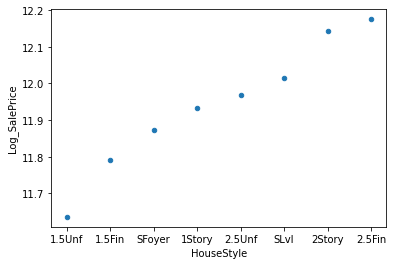

In [405]:
cleaned_data[['HouseStyle', 'Log_SalePrice']].groupby('HouseStyle').agg('median').sort_values(by='Log_SalePrice', ascending=True).reset_index(inplace=False).plot(kind= 'scatter', x='HouseStyle', y='Log_SalePrice')

In [406]:
cleaned_data.HouseStyle.value_counts()

1Story    1278
2Story     772
1.5Fin     283
SLvl       118
SFoyer      70
2.5Unf      22
1.5Unf      19
2.5Fin       6
Name: HouseStyle, dtype: int64

In [407]:
cleaned_data.HouseStyle = cleaned_data.HouseStyle.replace({'1.5Unf': 1, '1.5Fin':2, 'SFoyer':3, '1Story':4, '2.5Unf': 5, '2.SLvl': 6, '2Story': 7, '2.5Fin':8})

## RoofStyle

<AxesSubplot:xlabel='RoofStyle', ylabel='Log_SalePrice'>

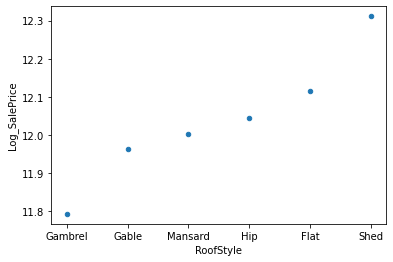

In [408]:
cleaned_data[['RoofStyle', 'Log_SalePrice']].groupby('RoofStyle').agg('median').sort_values(by='Log_SalePrice', ascending=True).reset_index(inplace=False).plot(kind= 'scatter', x='RoofStyle', y='Log_SalePrice')

In [409]:
cleaned_data.RoofStyle = cleaned_data.RoofStyle.replace({'Gambrel': 1, 'Gable':2, 'Mansard':3, 'Hip':4, 'Flat': 5, 'Shed': 6})

<AxesSubplot:xlabel='RoofMatl', ylabel='Log_SalePrice'>

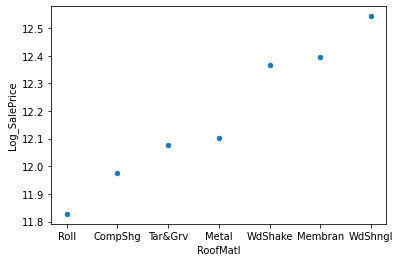

In [410]:
cleaned_data[['RoofMatl', 'Log_SalePrice']].groupby('RoofMatl').agg('median').sort_values(by='Log_SalePrice', ascending=True).reset_index(inplace=False).plot(kind= 'scatter', x='RoofMatl', y='Log_SalePrice')

In [411]:
cleaned_data.RoofMatl = cleaned_data.RoofMatl.replace({'Roll': 1, 'CompShg':2, 'Tar&Grv':3, 'Metal':4, 'WdShake': 5, 'Membran': 6, 'WdShngl':7})

## Exterior1st

In [412]:
cleaned_data[['Exterior1st', 'Log_SalePrice']].groupby('Exterior1st').agg('median').sort_values(by='Log_SalePrice', ascending=True).reset_index(inplace=False)

,Exterior1st,Log_SalePrice
0,AsphShn,11.415981
1,CBlock,11.435037
2,AsbShng,11.626214
3,WdShing,11.808814
4,Stucco,11.813030
5,MetalSd,11.831379
6,Wd Sdng,11.842229
7,HdBoard,11.946991
8,Plywood,11.968766
9,BrkComm,11.970350


In [413]:
cleaned_data.Exterior1st = cleaned_data.Exterior1st.replace({'AsphShn': 1, 'CBlock':2, 'AsbShng':3, 'WdShing':4, 'Stucco': 5, 'MetalSd': 6, 'Wd Sdng':7, 'HdBoard': 8, 'Plywood': 9, 'BrkComm': 10, 'BrkFace': 11, 'VinylSd': 12, 'CemntBd': 13, 'PreCast': 14, 'ImStucc': 15})

## Exterior2nd

In [414]:
cleaned_data[['Exterior2nd', 'Log_SalePrice']].groupby('Exterior2nd').agg('median').sort_values(by='Log_SalePrice', ascending=True).reset_index(inplace=False)

,Exterior2nd,Log_SalePrice
0,Stone,11.426641
1,CBlock,11.561716
2,AsbShng,11.617285
3,AsphShn,11.677577
4,Stucco,11.813030
5,MetalSd,11.838264
6,Wd Shng,11.838619
7,Wd Sdng,11.842229
8,Brk Cmn,11.891362
9,HdBoard,11.957591


In [415]:
cleaned_data.Exterior2nd = cleaned_data.Exterior2nd.replace({'Stone': 1, 'CBlock':2, 'AsbShng':3, 'AsphShn':4, 'Stucco': 5, 'MetalSd': 6, 'Wd Shng':7, 'Wd Sdng':8, 'Brk Cmn': 9, 'HdBoard': 10, 'Plywood': 11, 'BrkFace': 12, 'ImStucc': 13, 'VinylSd': 14, 'CmentBd': 15, 'PreCast': 16})

## MasVnrType

<AxesSubplot:xlabel='MasVnrType', ylabel='Log_SalePrice'>

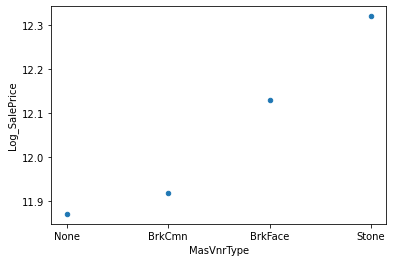

In [416]:
cleaned_data[['MasVnrType', 'Log_SalePrice']].groupby('MasVnrType').agg('median').sort_values(by='Log_SalePrice', ascending=True).reset_index(inplace=False).plot(kind= 'scatter', x='MasVnrType', y='Log_SalePrice')

In [417]:
cleaned_data.MasVnrType = cleaned_data.MasVnrType.replace({'None': 1, 'BrkCmn':2, 'BrkFace':3, 'Stone':4})

## ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure

In [418]:
cleaned_data.ExterQual = cleaned_data.ExterQual.replace({'Po':1, 'Fa':2, 'TA': 3, 'Gd':4, 'Ex':5})
cleaned_data.ExterCond = cleaned_data.ExterCond.replace({'Po':1, 'Fa':2, 'TA': 3, 'Gd':4, 'Ex':5})
cleaned_data.BsmtQual = cleaned_data.BsmtQual.replace({'DNE':0, 'Po':1, 'Fa':2, 'TA': 3, 'Gd':4, 'Ex':5})
cleaned_data.BsmtCond = cleaned_data.BsmtCond.replace({'DNE':0, 'Po':1, 'Fa':2, 'TA': 3, 'Gd':4, 'Ex':5})
cleaned_data.BsmtExposure = cleaned_data.BsmtExposure.replace({'DNE':0, 'No':1, 'Mn':2, 'Av': 3, 'Gd':4})

## Foundation

<AxesSubplot:xlabel='Foundation', ylabel='Log_SalePrice'>

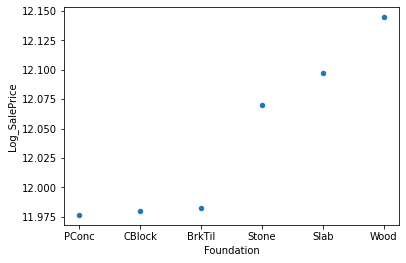

In [419]:
cleaned_data[['Foundation', 'Log_SalePrice']].groupby('Foundation').agg('median').sort_values(by='Log_SalePrice', ascending=True).reset_index(inplace=False).plot(kind= 'scatter', x='Foundation', y='Log_SalePrice')

In [420]:
cleaned_data.Foundation = cleaned_data.Foundation.replace({'PConc':1, 'CBlock':2, 'BrkTil': 3, 'Stone':4, 'Slab':5, 'Wood':6})

## BsmtFinType1, BsmtFinType2

In [421]:
cleaned_data.BsmtFinType1 = cleaned_data.BsmtFinType1.replace({'DNE':0, 'Unf':1, 'LwQ': 2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
cleaned_data.BsmtFinType2 = cleaned_data.BsmtFinType2.replace({'DNE':0, 'Unf':1, 'LwQ': 2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

## Heating

<AxesSubplot:xlabel='Heating', ylabel='Log_SalePrice'>

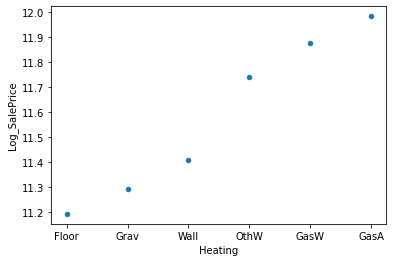

In [422]:
cleaned_data[['Heating', 'Log_SalePrice']].groupby('Heating').agg('median').sort_values(by='Log_SalePrice', ascending=True).reset_index(inplace=False).plot(kind= 'scatter', x='Heating', y='Log_SalePrice')

In [423]:
cleaned_data.Heating = cleaned_data.Heating.replace({'Floor':1, 'Grav':2, 'Wall': 3, 'OthW':4, 'GasW':5, 'GasA':6})

## HeatingQC

In [424]:
cleaned_data.HeatingQC = cleaned_data.HeatingQC.replace({'Po':1, 'Fa':2, 'TA': 3, 'Gd':4, 'Ex':5})

## Central Air

In [425]:
cleaned_data.CentralAir = cleaned_data.CentralAir.replace({'N':0, 'Y':1})

## Electrical System

<AxesSubplot:xlabel='Electrical', ylabel='Log_SalePrice'>

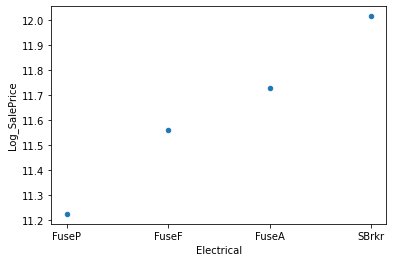

In [426]:
cleaned_data[['Electrical', 'Log_SalePrice']].groupby('Electrical').agg('median').sort_values(by='Log_SalePrice', ascending=True).reset_index(inplace=False).plot(kind= 'scatter', x='Electrical', y='Log_SalePrice')

In [427]:
cleaned_data.Electrical = cleaned_data.Electrical.replace({'FuseP':1, 'FuseF':2, 'FuseA': 3, 'SBrkr':4})

## KitchenQual

In [428]:
cleaned_data.KitchenQual = cleaned_data.KitchenQual.replace({'Po':1, 'Fa':2, 'TA': 3, 'Gd':4, 'Ex':5})

## Functional

<AxesSubplot:xlabel='Functional', ylabel='Log_SalePrice'>

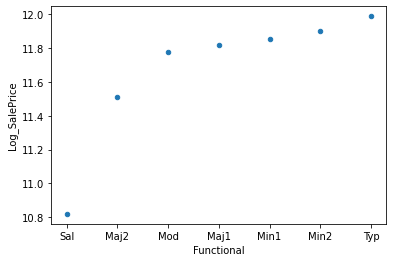

In [429]:
cleaned_data[['Functional', 'Log_SalePrice']].groupby('Functional').agg('median').sort_values(by='Log_SalePrice', ascending=True).reset_index(inplace=False).plot(kind= 'scatter', x='Functional', y='Log_SalePrice')

In [430]:
cleaned_data.Functional = cleaned_data.Functional.replace({'Sal':1, 'Maj2':2, 'Mod': 3, 'Maj1':4, 'Min1':5, 'Min2':6, 'Typ':7})

## FireplaceQu

In [431]:
cleaned_data.FireplaceQu = cleaned_data.FireplaceQu.replace({'DNE':0, 'Po':1, 'Fa': 2, 'TA':3, 'Gd':4, 'Ex':5})

## GarageType

<AxesSubplot:xlabel='GarageType', ylabel='Log_SalePrice'>

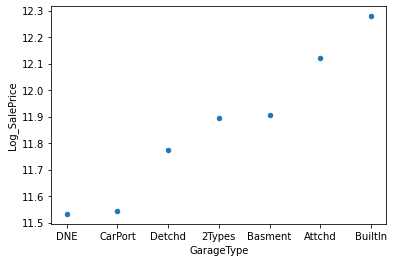

In [432]:
cleaned_data[['GarageType', 'Log_SalePrice']].groupby('GarageType').agg('median').sort_values(by='Log_SalePrice', ascending=True).reset_index(inplace=False).plot(kind= 'scatter', x='GarageType', y='Log_SalePrice')

In [433]:
cleaned_data.GarageType = cleaned_data.GarageType.replace({'DNE':0, 'CarPort':1, 'Detchd': 2, '2Types':3, 'Basment':4, 'Attchd':5, 'BuiltIn':6})

## GarageFinish

In [434]:
cleaned_data.GarageFinish = cleaned_data.GarageFinish.replace({'DNE':0, 'Unf':1, 'RFn': 2, 'Fin':3})

## GarageQual, GarageCond

In [435]:
cleaned_data.GarageQual = cleaned_data.GarageQual.replace({'DNE':0, 'Po':1, 'Fa': 2, 'TA':3, 'Gd':4, 'Ex':5})
cleaned_data.GarageCond = cleaned_data.GarageCond.replace({'DNE':0, 'Po':1, 'Fa': 2, 'TA':3, 'Gd':4, 'Ex':5})

## PavedDrive

In [436]:
cleaned_data.PavedDrive = cleaned_data.PavedDrive.replace({'N':1, 'P':2, 'Y': 3})

## PoolQc

In [437]:
cleaned_data.PoolQC = cleaned_data.PoolQC.replace({'DNE':0, 'Po':1, 'Fa': 2, 'TA':3, 'Gd':4, 'Ex':5})

## Fence

In [438]:
cleaned_data.Fence = cleaned_data.Fence.replace({'DNE':0, 'MnWw':1, 'GdWo': 2, 'MnPrv':3, 'GdPrv':4})

## MiscFeature

In [439]:
cleaned_data = one_hot_encode(cleaned_data, 'MiscFeature')

## SaleType

<AxesSubplot:xlabel='SaleType', ylabel='Log_SalePrice'>

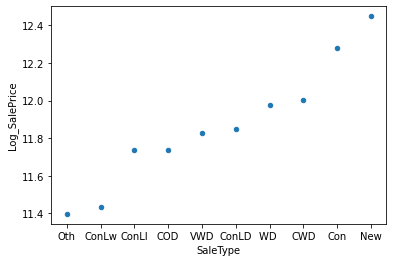

In [440]:
cleaned_data[['SaleType', 'Log_SalePrice']].groupby('SaleType').agg('median').sort_values(by='Log_SalePrice', ascending=True).reset_index(inplace=False).plot(kind= 'scatter', x='SaleType', y='Log_SalePrice')

In [441]:
cleaned_data.SaleType = cleaned_data.SaleType.replace({'Oth':1, 'ConLw':2, 'ConLI': 3, 'COD':4, 'VWD':5, 'ConLD':6, 'WD ':7, 'CWD':8, 'Con':9, 'New':10})

## SaleCondition


<AxesSubplot:xlabel='SaleCondition', ylabel='Log_SalePrice'>

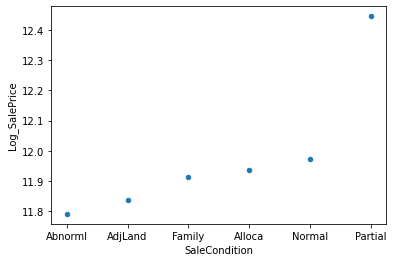

In [443]:
cleaned_data[['SaleCondition', 'Log_SalePrice']].groupby('SaleCondition').agg('median').sort_values(by='Log_SalePrice', ascending=True).reset_index(inplace=False).plot(kind= 'scatter', x='SaleCondition', y='Log_SalePrice')

In [444]:
cleaned_data = one_hot_encode(cleaned_data, 'SaleCondition')

In [446]:
cleaned_data.to_csv('data/complete_cleaned_data.csv')